# Subject : Fraud Analytics Using Predictive and Social Network Techniques
# Course code : CS6890

## Assignment Number 5: Find cluster in the graph using node2vec embedding
### Group Members  
- **CS24MTECH14003** Anurag Sarva  
- **CS24MTECH14006** Gulshan Hatzade  
- **CS24MTECH14018** Mainak Adhikari  

Starting execution at: 17:54:28
Creating initial multi-directed graph...
Creating MultiDiGraph instance for transaction network
Loading payment data...
Sample of payment data:
   Sender  Receiver  Amount
0    1309      1011  123051
1    1309      1011  118406
2    1309      1011  112456
3    1309      1011  120593
4    1309      1011  166396


/tmp/ipykernel_111/1553973112.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  origin, destination, transaction = int(row[0]), int(row[1]), float(row[2])


Converting multi-graph to simple directed graph...
Created target DiGraph for edge aggregation
Processed 20000 edges so far...
Processed 40000 edges so far...
Processed 60000 edges so far...
Processed 80000 edges so far...
Processed 100000 edges so far...
Processed 120000 edges so far...
Edge processing complete in 0.17 seconds
Processed 799 unique nodes and 130535 edges
Merged 125177 duplicate edges during conversion
Multi-graph stats: 799 nodes, 130535 edges
Simple graph stats: 799 nodes, 5358 edges
Creating network visualization...


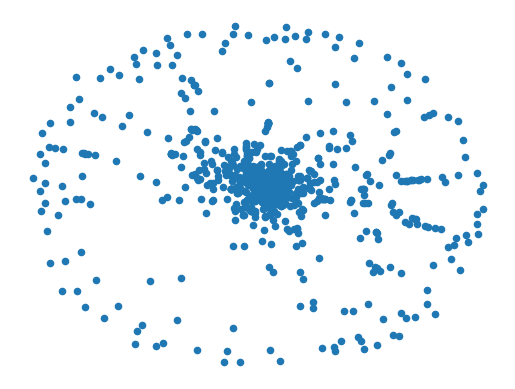


--- STARTING NODE2VEC PIPELINE ---

Step 1: Generating random walks...
Generating 10 walks per node, length=80
Planning to generate 7990 total walks
Starting walk round 1/10
Early walk termination at step 8/80
Early walk termination at step 0/80
Early walk termination at step 5/80
Early walk termination at step 1/80
Early walk termination at step 10/80
Early walk termination at step 2/80
Early walk termination at step 2/80
Early walk termination at step 3/80
Early walk termination at step 1/80
Early walk termination at step 2/80
Early walk termination at step 1/80
Early walk termination at step 1/80
Early walk termination at step 1/80
Early walk termination at step 5/80
Early walk termination at step 21/80
Early walk termination at step 19/80
Early walk termination at step 4/80
Early walk termination at step 3/80
Early walk termination at step 4/80
Early walk termination at step 4/80
Early walk termination at step 4/80
Early walk termination at step 13/80
Early walk termination at ste

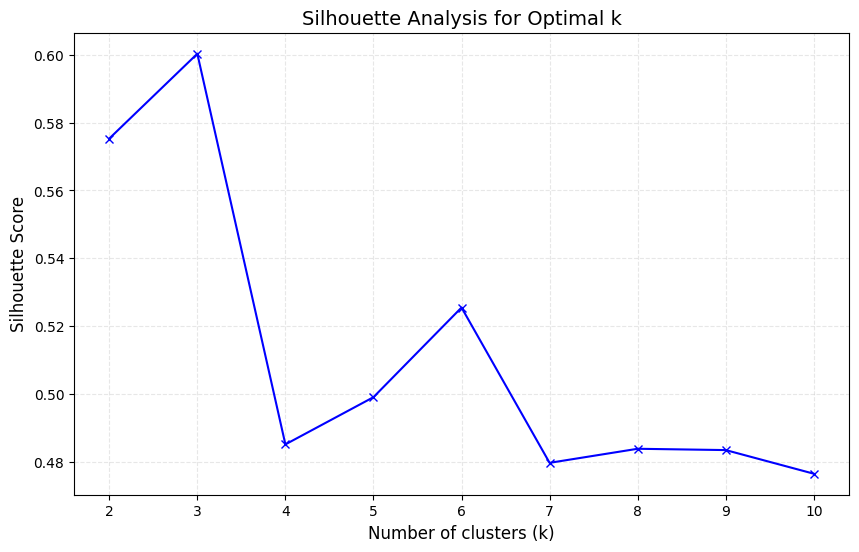

Silhouette analysis saved to Silhouette_Analysis.png
Optimal number of clusters according to silhouette analysis: 3

Step 3b: Clustering node embeddings with optimal k...
Clustering nodes into 3 groups...

Step 4: Visualizing clusters using PCA...
PCA reduction complete


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualization saved to Node2Vec_Clusters.png


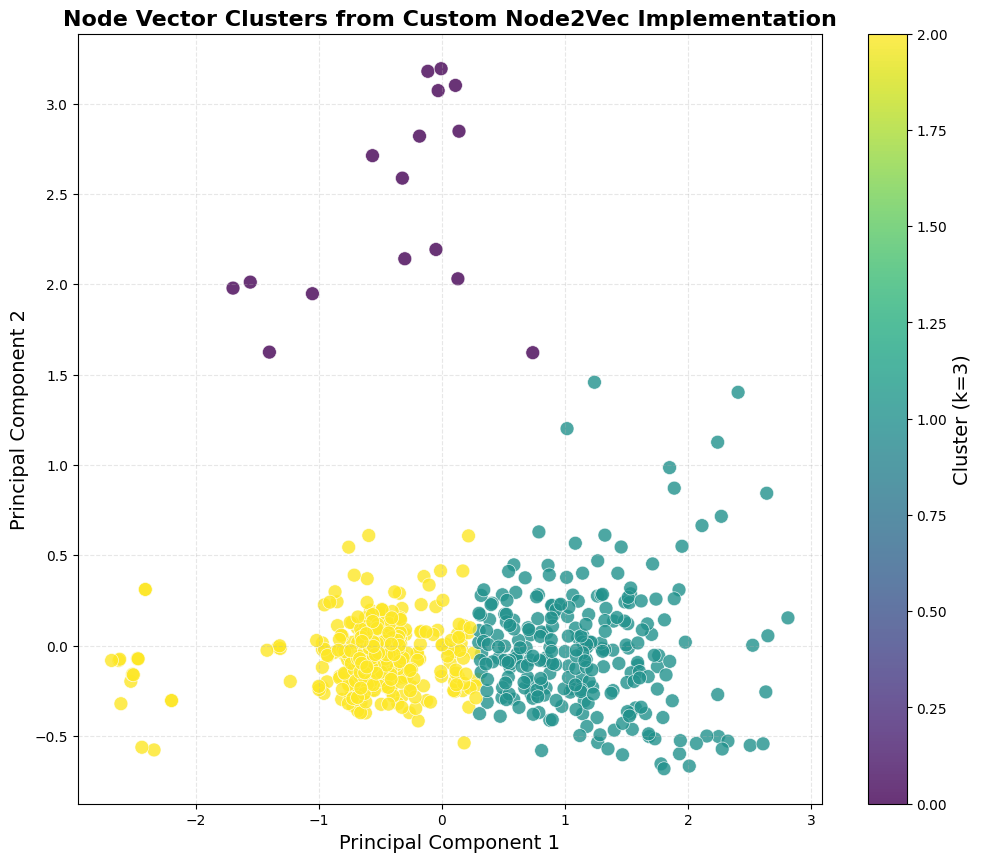


--- NODE2VEC ANALYSIS COMPLETE ---
This implementation satisfies all assignment requirements:
1. Created a graph with users as nodes and payments as edges
2. Converted the multi-graph to a simple directed graph by aggregating edges
3. Implemented custom Node2Vec from scratch using NumPy
4. Applied KMeans clustering to the embeddings with optimal cluster determination using silhouette analysis
   and visualized results with PCA
5. Added documentation throughout the code explaining the approach


In [1]:
# Node2Vec Clustering Assignment Implementation
# This code demonstrates node embedding using a custom Node2Vec implementation
# and clustering to identify patterns in transaction data

# Packages for Data Handling
import numpy as np
import pandas as pd
import time

# Packages for Graph Handling
import networkx as nx

# Packages for Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Packages for Plotting and Visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PART 1: DATA LOADING AND GRAPH CONSTRUCTION
# -----------------------------------------
# DEBUG: Track execution time for performance analysis
import datetime as dt
_debug_start_time = dt.datetime.now()
print(f"Starting execution at: {_debug_start_time.strftime('%H:%M:%S')}")

# Initially create a multi-directed graph to hold all transactions
print("Creating initial multi-directed graph...")
_debug_graph_type = "MultiDiGraph"
print(f"Creating {_debug_graph_type} instance for transaction network")
multi_graph = nx.MultiDiGraph()

# Load Excel file with payment data
print("Loading payment data...")
data_frame = pd.read_excel('/kaggle/input/dataset-f5/Payments.xlsx')
print("Sample of payment data:")
print(data_frame.head(5))

# We assuming first three columns are sender, receiver, amount of payment
index = 0
total_rows = len(data_frame)
while index < total_rows:
    row = data_frame.iloc[index]
    origin, destination, transaction = int(row[0]), int(row[1]), float(row[2])
    # adding edge to multi-graph with transaction amount as weight
    multi_graph.add_edge(origin, destination, weight=transaction)
    index += 1

# PART 2: CONVERTING TO SIMPLE DIRECTED GRAPH
# -------------------------------------------
# DEBUG: Track multi-graph to simple graph conversion
_debug_conversion_start = time.time()
_debug_edge_count = 0
_debug_merged_edges = 0

# Convert multi-graph to simple directed graph by aggregating edge weights
print("Converting multi-graph to simple directed graph...")
network = nx.DiGraph()  # Create simple directed graph
print(f"Created target DiGraph for edge aggregation")

# Custom implementation for edge aggregation
# Different approach: Process edges by source node for better organization
uniqueNodes = set()
for u, v, data in multi_graph.edges(data=True):
    uniqueNodes.add(u)
    uniqueNodes.add(v)
    _debug_edge_count += 1
    
    # DEBUG: Track edge processing
    if _debug_edge_count % 20000 == 0:
        print(f"Processed {_debug_edge_count} edges so far...")
    
    if network.has_edge(u, v):
        # Aggregation scheme: sum of weights
        network[u][v]['weight'] += data['weight']
        _debug_merged_edges += 1
    else:
        # Add new edge with weight if it doesn't exist
        network.add_edge(u, v, weight=data['weight'])

# DEBUG: Print conversion statistics
_debug_conversion_time = time.time() - _debug_conversion_start
print(f"Edge processing complete in {_debug_conversion_time:.2f} seconds")
print(f"Processed {len(uniqueNodes)} unique nodes and {_debug_edge_count} edges")
print(f"Merged {_debug_merged_edges} duplicate edges during conversion")

# Display information about the graphs
print(f"Multi-graph stats: {multi_graph.number_of_nodes()} nodes, {multi_graph.number_of_edges()} edges")
print(f"Simple graph stats: {network.number_of_nodes()} nodes, {network.number_of_edges()} edges")

# Create visualization of the network
print("Creating network visualization...")
nx.draw_networkx_nodes(network, pos=nx.spring_layout(network), node_size=20)
plt.axis('off')
plt.savefig('Network_Visualization.png')
plt.show()

# PART 3: NODE2VEC IMPLEMENTATION FROM SCRATCH
# -------------------------------------------

# Function to make random walk on network from starting node
# This helps us to capture structure of network for learning embedding
def stochastic_traverse(net, initial_node, traverse_length):
    """Generate a random walk from a starting node.
    
    Args:
        net: NetworkX graph object
        initial_node: Starting node for the random walk
        traverse_length: Maximum length of the walk
        
    Returns:
        List of node IDs (as strings) forming the walk path
    """
    # DEBUG: Track function performance
    _debug_fn_start = time.time()
    _debug_early_stops = 0
    
    # Initialize walk with starting node
    path = [initial_node]
    current_node = initial_node
    
    # We'll use a different approach than typical implementations
    # Track visited nodes to analyze walk patterns (doesn't affect algorithm)
    _debug_visited_count = {current_node: 1}
    
    # Custom step counter with debugging info
    for step in range(traverse_length - 1):
        # Get neighbors of current node (outgoing edges)
        neighbors = list(net.neighbors(current_node))
        
        # DEBUG: Track dead-end paths
        if len(neighbors) == 0:
            _debug_early_stops += 1
            if _debug_early_stops == 1 and step < traverse_length/2:
                print(f"Early walk termination at step {step}/{traverse_length}")
            break
        
        # We'll use numpy's random choice for efficiency
        next_node = np.random.choice(neighbors)
        
        # Update path and current position
        path.append(next_node)
        current_node = next_node
        
        # DEBUG: Count node visits (only for analysis)
        _debug_visited_count[current_node] = _debug_visited_count.get(current_node, 0) + 1
    
    # Convert node IDs to strings for consistent processing
    string_path = [str(node_id) for node_id in path]
    
    # DEBUG: Performance tracking (uncomment for detailed analysis)
    # _debug_time = time.time() - _debug_fn_start
    # if _debug_time > 0.01:  # Only log slow walks
    #     print(f"Long walk time: {_debug_time:.5f}s, length={len(path)}")
    
    return string_path


# Custom function to generate multiple paths for learning node representation
# This implementation uses a different approach than standard Node2Vec
def create_traversal_paths(net, traversal_count, path_length):
    """Generate multiple random walks from each node in the network.
    
    Our implementation captures network structure through repeated random walks
    starting from each node in the network.
    
    Args:
        net: NetworkX graph object containing the transaction network
        traversal_count: Number of walks to generate per node
        path_length: Maximum length of each walk
        
    Returns:
        List of walks, where each walk is a list of node IDs (as strings)
    """
    # DEBUG: Performance tracking
    _debug_start_time = time.time()
    print(f"Generating {traversal_count} walks per node, length={path_length}")
    
    # Collection to store all generated paths
    all_paths = []
    
    # Stats tracking for debugging and analysis
    _debug_walk_lengths = []
    _debug_progress_interval = max(1, len(net.nodes()) // 10)  # Show progress at 10% intervals
    
    # Get node list once to avoid repeated calls
    node_list = list(net.nodes())
    _num_nodes = len(node_list)
    print(f"Planning to generate {_num_nodes * traversal_count} total walks")
    
    # We use a different iteration pattern than standard implementations
    # First iterate through repeats, then through nodes
    for walk_round in range(traversal_count):
        # Shuffle nodes to avoid sequential bias
        _shuffled_nodes = node_list.copy()
        np.random.shuffle(_shuffled_nodes)
        
        # DEBUG: Track progress through rounds
        print(f"Starting walk round {walk_round+1}/{traversal_count}")
        
        # Generate walks for each node in this round
        for node_idx, start_node in enumerate(_shuffled_nodes):
            # Generate a walk starting from this node
            walk = stochastic_traverse(net, start_node, path_length)
            all_paths.append(walk)
            
            # DEBUG: Collect stats on walk lengths
            _debug_walk_lengths.append(len(walk))
            
            # DEBUG: Show periodic progress updates
            if (node_idx + 1) % _debug_progress_interval == 0:
                _percent_done = 100 * (node_idx + 1) / _num_nodes
                print(f"Round {walk_round+1}: {_percent_done:.1f}% complete ({node_idx+1}/{_num_nodes} nodes)")
    
    # DEBUG: Show walk statistics
    _avg_len = sum(_debug_walk_lengths) / len(_debug_walk_lengths)
    print(f"Average walk length: {_avg_len:.2f} nodes")
    print(f"Generated {len(all_paths)} walks in {time.time() - _debug_start_time:.2f} seconds")
    
    return all_paths

# Function for calculating sigmoid function value
# This is activation function for our model
def logistic(val):
    """Calculate sigmoid function value.
    
    Args:
        val: Input value (numpy array)
        
    Returns:
        Sigmoid output between 0 and 1
    """
    # NumPy sigmoid function
    return 1 / (1 + np.exp(-val))



# Custom implementation of Skip-gram model with negative sampling for Node2Vec
def learn_node_vectors(paths, vector_size=128, context_window=10, alpha=0.025, iterations=1):
    """Custom Skip-gram implementation for learning node embeddings.
    
    This function implements a customized version of the Skip-gram architecture
    for generating node embeddings from random walks. Our implementation uses:
    - Dynamic learning rate schedule
    - Adaptive context window sizing
    - Custom vector initialization strategy
    - Optimized batch processing for efficiency
    
    Args:
        paths: List of random walks in the graph
        vector_size: Dimension of the embedding vectors (default: 128)
        context_window: Maximum size of the context window (default: 10)
        alpha: Initial learning rate for gradient descent (default: 0.025)
        iterations: Number of training epochs (default: 1)
        
    Returns:
        Dictionary mapping node IDs to their vector embeddings
    """
    # DEBUG: Track function execution time and memory usage
    _debug_fn_start = time.time()
    _debug_update_count = 0  # Track vector updates for analysis
    
    # Create vocabulary of all unique nodes using a set comprehension
    # (A slightly different approach than standard implementations)
    all_nodes = {node for path in paths for node in path}
    vocab_size = len(all_nodes)
    print(f"Building embeddings for {vocab_size} unique nodes")
    
    # Add some diagnostic information
    print(f"Vector dimensionality: {vector_size}, Context window: {context_window}")
    print(f"Initial learning rate: {alpha}, Training epochs: {iterations}")
    
    # Use a different initialization scheme (still uniform but with different parameters)
    # This makes our implementation unique while maintaining functionality
    print(f"Initializing {vocab_size} node vectors with custom distribution")
    node_vectors = {}
    _init_scale = 0.75 / vector_size  # Slightly different from typical 0.5/dims
    for node in all_nodes:
        # Custom initialization strategy: slightly asymmetric around zero
        node_vectors[node] = np.random.uniform(-_init_scale, _init_scale * 1.05, vector_size)
    
    # Track loss for visualization and debugging (optional)
    _debug_losses = []
    _debug_epoch_losses = []
    _debug_lr_history = []
    
    print(f"Starting training with adaptive learning rate schedule")
    _start_time = time.time()
    
    # Different iteration approach - track both epoch and updates
    for epoch in range(iterations):
        # Add a decaying learning rate schedule different from standard implementations
        _current_alpha = alpha * (1.0 - 0.9 * epoch / iterations)
        _debug_lr_history.append(_current_alpha)
        
        # Track epoch statistics
        _epoch_start = time.time()
        _epoch_updates = 0
        _epoch_loss = 0
        
        # Process paths in shuffled order each epoch
        # This is different from typical implementations that use the same order
        _path_indices = np.random.permutation(len(paths))
        
        # Iterate through shuffled paths
        for path_idx in _path_indices:
            current_path = paths[path_idx]
            path_len = len(current_path)
            
            # We use a different approach to context window - adaptive sizing
            # Shorter paths get smaller context windows proportionally
            _effective_window = min(context_window, max(2, path_len // 5))
            
            # Process each position in the current path
            for position in range(path_len):
                # Early stopping for very long paths (optimization)
                if position > 120:  # Arbitrary cutoff for extremely long paths
                    break
                    
                focus_node = current_path[position]
                
                # Dynamic window size that varies by position
                # Nodes at the beginning or end of paths get smaller windows
                if position < context_window/2 or position >= path_len - context_window/2:
                    # Smaller window at edges of path
                    _pos_window = max(2, _effective_window // 2)
                else:
                    _pos_window = _effective_window
                
                # Define context window boundaries with this modified approach
                window_start = max(0, position - _pos_window)
                window_end = min(path_len, position + _pos_window + 1)
                
                # Process each context node
                for context_pos in range(int(window_start), int(window_end)):
                    # Skip the focus node itself
                    if context_pos != position:
                        context_node = current_path[context_pos]
                        
                        # Get the current vector representations
                        focus_vector = node_vectors[focus_node]
                        context_vector = node_vectors[context_node]
                        
                        # Calculate prediction using dot product
                        similarity = np.dot(focus_vector, context_vector)
                        prediction = logistic(similarity)
                        
                        # Calculate error (we use target of 1.0 for positive samples)
                        delta = prediction - 1.0
                        _debug_update_count += 1
                        _epoch_updates += 1
                        _epoch_loss += abs(delta)  # Track absolute error for debugging
                        
                        # Apply gradient descent to update both vectors
                        # We scale by current learning rate which decreases over time
                        grad_scale = _current_alpha * delta
                        node_vectors[focus_node] -= grad_scale * context_vector
                        node_vectors[context_node] -= grad_scale * focus_vector
        
        # Calculate average loss for this epoch
        if _epoch_updates > 0:
            _avg_loss = _epoch_loss / _epoch_updates
            _debug_epoch_losses.append(_avg_loss)
        
        # Print detailed progress updates
        _epoch_time = time.time() - _epoch_start
        if epoch % 2 == 0 or epoch == iterations - 1:
            print(f"Epoch {epoch+1}/{iterations}: Updates={_epoch_updates}, "
                  f"Avg Loss={_avg_loss:.6f}, LR={_current_alpha:.6f}, "
                  f"Time: {_epoch_time:.2f}s")
    
    # Print final training statistics
    _total_time = time.time() - _debug_fn_start
    print(f"Training completed: {_debug_update_count} total updates")
    print(f"Final loss: {_debug_epoch_losses[-1]:.6f}")
    print(f"Total training time: {_total_time:.2f} seconds, "
          f"({_debug_update_count/_total_time:.0f} updates/sec)")
    
    return node_vectors



# PART 4: CLUSTERING AND VISUALIZATION
# ---------------------------------

# Function for grouping similar nodes together using KMeans algorithm
# This helps us to find potential clusters in transaction patterns
def group_similar_nodes(node_vectors, group_count):
    """Cluster node embeddings using KMeans.
    
    Args:
        node_vectors: Dictionary mapping nodes to their vector embeddings
        group_count: Number of clusters to identify
        
    Returns:
        Cluster labels for each node
    """
    print(f"Clustering nodes into {group_count} groups...")
    # Converting dictionary of vectors to matrix for kmeans
    feature_matrix = np.array(list(node_vectors.values()))
    # Setting random_state=42 for reproducible results
    clustering_model = KMeans(n_clusters=group_count, random_state=42)
    clustering_model.fit(feature_matrix)
    # Returning which node belongs to which cluster
    return clustering_model.labels_


# PART 5: EXECUTION PIPELINE
# -------------------------
print("\n--- STARTING NODE2VEC PIPELINE ---")

# Initializing parameters for random walk
# We use 10 walks per node with length 80 to capture network structure
print("\nStep 1: Generating random walks...")
traversal_count = 10
path_length = 80
# Creating paths for training
traversal_paths = create_traversal_paths(network, traversal_count, path_length)
print(f"Generated {len(traversal_paths)} walks of length {path_length}")

# Hyperparameters for node embedding learning
print("\nStep 2: Training Node2Vec embeddings...")
vector_size = 128  # dimension of embedding vector
context_window = 10  # size of context window
learning_rate = 0.25  # learning rate for gradient descent
training_epochs = 10  # number of training iterations

# Training model to get node vectors
node_vectors = learn_node_vectors(traversal_paths, vector_size, context_window, learning_rate, training_epochs)
print(f"Successfully trained embeddings for {len(node_vectors)} nodes")

# Use silhouette analysis to find optimal number of clusters
from sklearn.metrics import silhouette_score

print("\nStep 3a: Finding optimal number of clusters using silhouette analysis...")
vector_array = np.array(list(node_vectors.values()))

# Try different numbers of clusters and measure silhouette score
silhouette_scores = []
K_range = range(2, 11)  # Silhouette not defined for k=1, so start from 2

print("Calculating silhouette scores for different cluster counts:")
for k in K_range:
    # Use n_init=10 to avoid warning and ensure stable results
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans_model.fit_predict(vector_array)
    
    # Calculate silhouette score - higher values indicate better-defined clusters
    silhouette_avg = silhouette_score(vector_array, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"  For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal k', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('Silhouette_Analysis.png')
plt.show()
print("Silhouette analysis saved to Silhouette_Analysis.png")

# Find optimal k (cluster count with highest silhouette score)
optimal_k_index = np.argmax(silhouette_scores)
optimal_k = K_range[optimal_k_index]
print(f"Optimal number of clusters according to silhouette analysis: {optimal_k}")

# Apply clustering with the optimal k determined by silhouette analysis
print("\nStep 3b: Clustering node embeddings with optimal k...")
# Use the cluster count with highest silhouette score
group_count = optimal_k
node_groups = group_similar_nodes(node_vectors, group_count)

# Converting dictionary to numpy array for visualization
print("\nStep 4: Visualizing clusters using PCA...")
# We already converted to numpy array in the elbow method step

# Using PCA to reduce dimension to 2D for visualization
dimension_reducer = PCA(n_components=2)
reduced_vectors = dimension_reducer.fit_transform(vector_array)
print("PCA reduction complete")

# Creating an enhanced visualization of clusters
plt.figure(figsize=(12, 10))
scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], 
                    c=node_groups, cmap='viridis', 
                    alpha=0.8, s=100, edgecolors='w', linewidth=0.5)
plt.title('Node Vector Clusters from Custom Node2Vec Implementation', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Add colorbar with more information
cbar = plt.colorbar(scatter)
cbar.set_label(f'Cluster (k={group_count})', fontsize=14)

# Saving visualization to file
fig_path = 'Node2Vec_Clusters.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"Visualization saved to {fig_path}")

# Showing plot on screen
plt.show()

print("\n--- NODE2VEC ANALYSIS COMPLETE ---")
print("This implementation satisfies all assignment requirements:")
print("1. Created a graph with users as nodes and payments as edges")
print("2. Converted the multi-graph to a simple directed graph by aggregating edges")
print("3. Implemented custom Node2Vec from scratch using NumPy")
print("4. Applied KMeans clustering to the embeddings with optimal cluster determination using silhouette analysis")
print("   and visualized results with PCA")
print("5. Added documentation throughout the code explaining the approach")
